## Introduction to working with pharmacogenomic data and Jupyter notebooks

### *A short hands-on guide for exploring pharmacogenomic databases using python scripts*

In today's workshop we will have a quick overview on how to extract data from public ressources in the field of pharmacogenomics and how to explore aggregated and individual information with Jupyter notebooks.

The workshop will be divided in roughly 3 parts:

- Introduction to Jupyter notebooks and PharmGKB drug label data (20 min)
- Data preparation and data exploration of clinical variants (20 min)
- Focused assessment of mutations in a specific protein family (20 min)

These are the learning objectives of today's workshop:

- General data handling concepts including data aggregation and visualization through a glimpse into Jupyter Notebooks
- Overview of the publicly available pharmacogenomic data landscape
- Understanding the different types of variations and their possible effect on drug response


To make things easier you find a range of icons througout this notebook. They roughly correspond to the following:

- 🎯: Plan of action
- 💡: Useful information
- 💥: Action point or own reflections required
- 📌: Interpretations of results
- ❗️: Watch out!

## Jupyter Notebooks

💡 The Jupyter Notebook is an open-source web application that allows data scientists to create and share documents that integrate live code, equations, computational output, visualizations, and other multimedia resources, along with explanatory text in a single document.

❗️ This is an interactive notebook, which means you are able to run the code that is written in each of the cells.

There are two types od cells:
1. **Markdown**, which is a lightweight markup language for creating formatted text
2. **Code**, executable python code

❗️ Wheneve ryou see a **#** in a **Code** cell, then this is not excecuted, but rather serves as documentation to explain the code


#### Running python code in this notebook

<div class="alert alert-info" role="alert">

❗️ **To run the code in a cell, you should:**
- Place your mouse cursor in the cell, and click (this gives the cell *focus*) to make it active 
- Hold down the <b>Shift</b> key, and press the <b>Return</b> key.

If this is successful, you should see the input marker to the left of the cell change from

```
In [ ]:
```

to (for example)

```
In [1]:
```

and you may see output appear below the cell.

## PharmGKB

🎯 Lets start by looking into PharmGKB, a publicly available online knowledge base responsible for the aggregation, curation, integration and dissemination of knowledge regarding the impact of human genetic variation on drug response.

[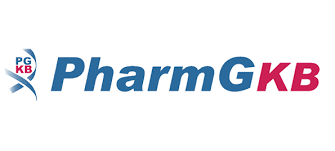](https://www.pharmgkb.org/)

We are going to look at two files from [PharmGKB](https://www.pharmgkb.org/downloads):
1. The "[drugLabels.zip](https://www.pharmgkb.org/page/downloadLabelHelp)", which contains drug label annotations form major drug agencies (e.g the FDA, EMA etc.)
2. The "[clinicalVariants.zip](https://www.pharmgkb.org/page/downloadClinicalVariantHelp)", which contains a list of variant-drug pairs and level of evidence for all clinical annotations

A file with additional information on the drug compounds has been prepared with information available from
[<img src="https://go.drugbank.com/assets/logo-white-dd185d748ee0164b8ee8f88df29235cd8cfc7936a3c974589262c667e9294219.svg">](https://go.drugbank.com/)

🎯 We start by loading the **drugLabels** data into a pandas dataframe and start exploring!

❗️But before we can start, we need to pull some necessary data file and load (and install) additional packages and modules into our Jupyter notebook:

In [ ]:
!git clone https://github.com/AlexanderHauser/PGx-workshop

In [723]:
import pandas as pd # data manipulation and analysis
import re # regular expressions
import numpy as np # support for high-level mathematical functions

import matplotlib.pyplot as plt # plotting library
import seaborn as sns # API on top of Matplotlib

# Pandas custom display options:
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', 40)

In [724]:
!pip install py3Dmol

import py3Dmol
from ipywidgets import interact, IntSlider, widgets # allows interactive widgets
from IPython.display import display

## 1. **Drug Label annotations**

In [725]:
# Load data and take a look
dl_merge = pd.read_csv("/content/PGx-workshop/data/drugLabels_drugbank.csv")
dl_merge.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/PGx-workshop/data/drugLabels_drugbank.csv'

📌 ➙ We see that there is a lot of information for a lot of drugs with annotations in PharmGKB. We want to start by looking at all the drugs with *Informative PGx*, *Actionable PGx*, *Testing required*, or *Testing recommended* from the different drug agencies.

Text(0, 0.5, 'Number of drugs')

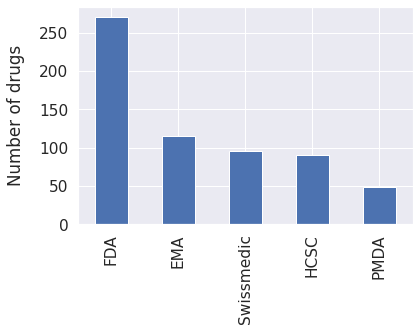

In [12]:
sns.set(font_scale=1.4)
dl_merge[['Source', 'name']].drop_duplicates()['Source'].value_counts().plot(kind='bar')
plt.ylabel("Number of drugs", labelpad=14)

💡
**FDA**: U.S. Food and Drug Administration
**EMA**: European Medicines Agency
**PMDA**: Japanese Pharmaceuticals and Medical Devices Agency
**HCSC**: Health Canada (Sant  Canada)
**Swissmedic**, Swiss Agency of Therapeutic Products.

📌 ➙  We see that most pharmacogenetic information is provided by the FDA.

💡 There are different testing "levels" for a given drug, i.e.

**1. Testing required:**
The label states or implies that some sort of gene, protein or chromosomal testing, including genetic testing, functional protein assays, cytogenetic studies, etc., should be conducted before using this drug. This requirement may only be for a particular subset of patients. PharmGKB considers labels that state the variant is an indication for the drug, as implying a test requirement. If the label states a test "should be" performed, this is also interpreted as a requirement.

**2. Testing recommended:**
The label states or implies that some sort of gene, protein or chromosomal testing, including genetic testing, functional protein assays, cytogenetic studies, etc., is recommended before using this drug. This recommendation may only be for a particular subset of patients. PharmGKB considers labels that say testing "should be considered" or "Consider genotyping or phenotyping" to be recommending testing.

**3. Actionable PGx:**
The label may contain information about changes in efficacy, dosage, metabolism or toxicity due to gene/protein/chromosomal variants or phenotypes (e.g. "poor metabolizers"). Or the label may mention contraindication of the drug in a particular subset of patients with particular variants/genotypes/phenotypes. However, the label does not require or recommend gene, protein or chromosomal testing.

**4. Informative PGx:**
The label contains information stating that particular gene/protein/chromosomal variants or metabolizer phenotypes do not affect a drug’s efficacy, dosage, metabolism or toxicity. Or, the label states that particular variants or phenotypes affect a drug’s efficacy, dosage, metabolism or toxicity, but this e💡ffect is not “clinically” significant OR The label appears or appeared on the FDA Biomarker List but does not currently meet the requirements to be assigned as “Testing required”, “Testing recommended” or “Actionable PGx”. PharmGKB annotates every label that appears on the FDA Biomarker list, regardless of whether we would otherwise annotate the label.



🎯 So let's look how many drugs fall into which category:


<AxesSubplot:xlabel='Number of drugs', ylabel='Testing Level'>

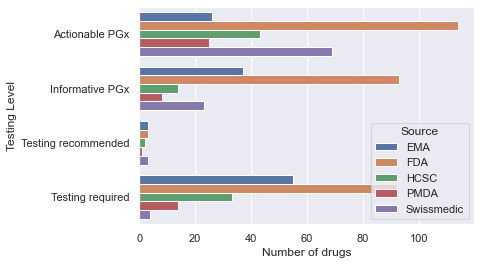

In [ ]:
sns.set(font_scale=1.0)
df_action = dl_merge[['Testing Level', 'Source', 'name']].drop_duplicates().groupby(['Testing Level', 'Source']).size().reset_index(name='Number of drugs')

sns.barplot(y='Testing Level', x='Number of drugs', hue='Source', data=df_action)

📌 ➙  There seems to be a lot of actionable and informative PGx drug labels, with just about 100 drugs with required PGx testing for (sometimes a particular subset of) patients.

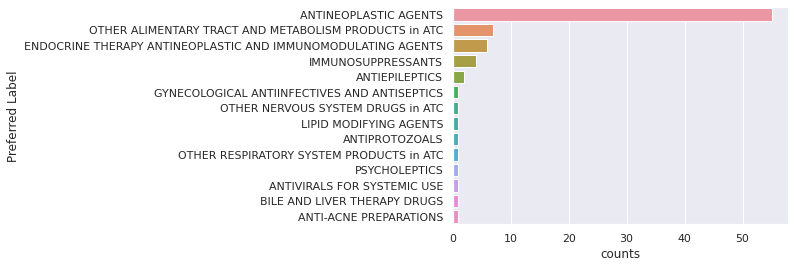

In [13]:
atc = pd.read_csv("/content/PGx-workshop/data/ATC_system.csv")
atc['atc'] =  atc['Class ID'].str.split('/', expand=True)[5]

# Use only the high level ATC code, i.e. the first 3 characters
dl_merge['atc_3'] = dl_merge.atc_codes.apply(eval).apply(lambda x: x[0][:3] if len(x) >0 else 'nan')

# Focus on 'Testing required' here for now
atc_counts = dl_merge[dl_merge['Testing Level']=='Testing required'][['Chemicals', 'atc_3']].drop_duplicates()['atc_3'].value_counts().head(20).rename_axis('atc_3').to_frame('counts')

atc_df = atc_counts.merge(atc[['Preferred Label', 'atc']], left_index=True, right_on = 'atc')

sns.set(font_scale=1.0)
sns.barplot(y='Preferred Label', x='counts', data=atc_df)

📌 ➙ A great majority of PGx required tests are for cancer medications.

💥 What are the most common disease areas for informative or actionable PGx labels? To investigate this, you should change the code above to "Informative PGx" and/or "Actionable PGx" at the right place

🎯 Let's look at the most common variants with *Testing required* labels:

In [728]:
# Output only the top 2 results with the most drug-variant associations
dl_merge[dl_merge['Testing Level']=='Testing required'][['Chemicals', 'Variants/Haplotypes']].drop_duplicates()['Variants/Haplotypes'].value_counts().head(2)

rs113488022    7
rs121434568    4
Name: Variants/Haplotypes, dtype: int64

📌💡 ➙ the **rs113488022** variant (V600E) is a mutation of the BRAF gene in which valine (V) is substituted by glutamic acid (E) at amino acid 600. It is a well known driver mutation in melanoma and an important diagnostic variant for cancer PGx. The V600E variant protein has elevated kinase activity that transforms cells and generates tumors [(Davies et al, 2002; Nature)](dx.doi.org/10.1038%2Fnature00766). This discovery led to the development and approval of the BRAF V600E inhibitor vemurafenib.

💥 Can you identify some non-cancer related variant-drug annotations? Let's share some interesting ones here. You can change the ".head(2)" filter in the above code and could search for variant/haplotype identifiers directly in [PharmGKB](https://www.pharmgkb.org/) or e.g. in [SNPedia](https://www.snpedia.com/index.php/SNPedia)

## 2. **Clinical Variant annotations**

🎯 Let's look at all annotated variant-drug pairs alongside their level of evidence

In [16]:
df_clinicalraw = pd.read_csv("/content/PGx-workshop/data/clinicalVariants.tsv", sep='\t')
df_clinicalraw.head()

,variant,gene,type,level of evidence,chemicals,phenotypes
0,"CYP2C9*1, CYP2C9*2, CYP2C9*3, CYP2C9*13",CYP2C9,Metabolism/PK,1A,meloxicam,NaN
1,"CYP2C9*1, CYP2C9*3, CYP2C9*13",CYP2C9,Metabolism/PK,1A,lornoxicam,NaN
2,"CYP2C9*1, CYP2C9*2, CYP2C9*3",CYP2C9,Metabolism/PK,1A,siponimod,NaN
3,rs17376848,DPYD,Toxicity,1A,capecitabine,Neoplasms
4,rs2297595,DPYD,Toxicity,1A,capecitabine,Neoplasms


📌 ➙ for each row we find information on every annotated variant/haplotype pair with information on the level of evidence

💡 PharmGKBs assigns [clinical annotation levels of evidence](https://www.pharmgkb.org/page/clinAnnLevels) (LOE)

[<img src="https://s3.pgkb.org/attachment/CA_Levels_of_Evidence.svg" style="width:300px;">](https://www.pharmgkb.org/page/clinAnnLevels)

🎯 Let's take a look at the level of evidence for different protein targets:

In [733]:
print(f'Number of genes with PGx drug-variant information: {df_clinicalraw.gene.nunique()}')

print(f'Number of unique variant/haplotypes: {df_clinicalraw.variant.nunique()}')


print('\nTop 5 genes with the highest number of drug-gene annotations:')
print(df_clinicalraw[(df_clinicalraw['level of evidence'] == '1A')].groupby('gene')['chemicals'].nunique().reset_index(name='count').sort_values(by='count', ascending=False).head(5))

# preview some data (top 3) for the most prevelant CYP2D6 gene:
df_clinicalraw[(df_clinicalraw['gene'] == 'CYP2D6')].head(3)

Number of genes with PGx drug-variant information: 1052
Number of unique variant/haplotypes: 3005

Top 5 genes with the highest number of drug-gene annotations:
       gene  count
5    CYP2D6     24
3   CYP2C19     14
4    CYP2C9     10
0   CACNA1S      7
13    HLA-B      6


,variant,gene,type,level of evidence,chemicals,phenotypes
25,"CYP2D6*1, CYP2D6*2, CYP2D6*4, CYP2D6...",CYP2D6,Metabolism/PK,1A,hydrocodone,NaN
26,"CYP2D6*1, CYP2D6*1xN, CYP2D6*2, CYP2...",CYP2D6,Efficacy,1A,ondansetron,Vomiting
27,"CYP2D6*1, CYP2D6*1xN, CYP2D6*2xN",CYP2D6,Efficacy,1A,tropisetron,Vomiting


📌 ➙ There are a number of genes and variants for which there is some evidence to support alternative drug response for carriers of a specific genotype

💥 Can you reuse/modify the above code to find the number of unique reoported **chemicals** with at least some annotated evidence for drug response variability?

💥 Do you have a favourite gene/protein? Maybe a gene/protein you work wit?. Is there any reported pharmacogenomic evidence for this gene/protein? Change the code at the bottom of the section above!

🎯 After you have looked at your own genes/proteins of interest. Let's now look at the aggregated gene/protein landscape. Which protein families are most often implicated in pharmacogenomics? In order to do so, we need information on the protein family, which we can obtain from  [<img src="https://www.uniprot.org/images/logos/Logo_medium.png" style="width:50px;">](https://www.uniprot.org/).

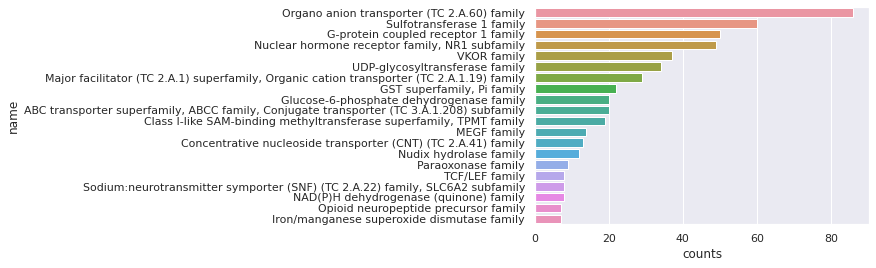

In [18]:
uniprot_df = pd.read_csv("/content/PGx-workshop/data/uniprot-proteome.tsv", sep="\t")

# Merge the uniprot information with the PharmGKB data frame. Use only variants that can be mapped to a specific gene:
df_clinicalraw_uniprot = df_clinicalraw[df_clinicalraw.gene.notnull()].merge(uniprot_df, left_on='gene', right_on='Gene names  (primary )')

top_families = df_clinicalraw_uniprot['Protein families'].value_counts().head(20).rename_axis('name').to_frame('counts').reset_index()

sns.set(font_scale=1.0)
sns.barplot(y='name', x='counts', data=top_families)

In [19]:
# List the most frequent protein families for each level of evidence
top_4_fams_loe = df_clinicalraw_uniprot.groupby(['Protein families', 'level of evidence']).size().sort_values().to_frame('counts').reset_index().sort_values(by=['level of evidence','counts'], ascending=[True, False]).groupby('level of evidence').head(4)

print(top_4_fams_loe)

,Protein families,level of evidence,counts
138,Nudix hydrolase family,1A,4
143,Class I-like SAM-binding methyltrans...,1A,4
131,VKOR family,1A,3
121,Organo anion transporter (TC 2.A.60)...,1A,2
140,VKOR family,1B,4
168,VKOR family,2A,8
151,Organo anion transporter (TC 2.A.60)...,2A,5
1,PurH family,2B,1
52,"Sodium channel (TC 1.A.1.10) family,...",2B,1
183,Organo anion transporter (TC 2.A.60)...,3,72


📌 ➙ Clearly, most variant-drug annotations are found for the metabolizing Cytochrome P450 enzyme family, i.e. with effect on the Pharmakokinetics. Less is known about the effect on variability in drug targets, i.e. the pharmacodynamics. For instance, there is a large group of annotations for G-protein coupled receptors.

💡 Depending on your variant/haplotype profile you are metabolyzing different drugs differently:

[<img src="https://www.annesmigraene.dk/wp-content/uploads/2020/04/metabolizers-engelsk-1024x616.png" style="width:400px;">]()



## **Variant specific investigation**

🎯 While we identified a number of genetic variations associated with a range of metabolizing enzymes and drug targets, we have not looked closer at the types of mutations. Now, we look closer at the mutations for the G protein-coupled receptor (GPCR) family, an important drug target family, which is targeted by ~1/3 of all approved drugs.

In [20]:
df_GPCRs_annot = pd.read_csv('/content/PGx-workshop/data/pharmGKB_GPCR_variants_annotation.csv')

print(df_GPCRs_annot.consequence.value_counts().head(15))

intron                           93
missense                         62
['missense', 'regulatory']       58
intron_variant                   48
upstream_transcript_variant      33
synonymous                       27
intergenic                       15
3_prime_UTR                      11
['synonymous', 'downstream']      8
['regulatory', 'upstream']        7
['regulatory', 'intron']          7
3_prime_UTR_variant               7
downstream                        6
upstream                          6
['regulatory', '5_prime_UTR']     6
Name: consequence, dtype: int64


📌 ➙ Most annotated GPCR mutations with impact on drug response are actually not resulting in any protein sequence differences (e.g. intron or upstream mutations)

💡 You can find an overview on variant definitions for instance at the [Open Targets Platform](https://platform.opentargets.org/variants)

💥 Why do some variants have multiple consequences reported?

💥 How can the different types of mutations possibly have an effect on toxicity or efficacy?

🎯 Next, we focus on the amino acid changing missense mutations in this dataset.

In [21]:
df_GPCRs_annot_mis = df_GPCRs_annot[(df_GPCRs_annot.consequence.fillna('').str.contains('missense'))].drop_duplicates().reset_index(drop=True)

df_GPCRs_annot_mis['proteinID'] = df_GPCRs_annot_mis['Entry name'].str.split('_', expand=True)[0]
df_GPCRs_annot_mis['Protein Consequence'] = df_GPCRs_annot_mis['oaa'] + df_GPCRs_annot_mis['SequenceNumber'].astype(int).astype(str) + df_GPCRs_annot_mis['naa']

df_GPCRs_annot_mis.head(3)

,variant,gene,type,level of evidence,chemicals,phenotypes,Entry,Entry name,Protein names,Gene names,Protein families,Gene names (primary ),rsID,gnomAD_AF,consequence,SequenceNumber,naa,oaa,proteinID,Protein Consequence
0,rs1042713,ADRB2,Efficacy,2A,salmeterol,Asthma,P07550,ADRB2_HUMAN,Beta-2 adrenergic receptor (Beta-2 a...,ADRB2 ADRB2R B2AR,"G-protein coupled receptor 1 family,...",ADRB2,rs1042713,0.425,missense,16.0,R,G,ADRB2,G16R
1,rs1042713,ADRB2,Toxicity,3,risperidone,Schizophrenia,P07550,ADRB2_HUMAN,Beta-2 adrenergic receptor (Beta-2 a...,ADRB2 ADRB2R B2AR,"G-protein coupled receptor 1 family,...",ADRB2,rs1042713,0.425,missense,16.0,R,G,ADRB2,G16R
2,rs1042713,ADRB2,Efficacy,3,methacholine,Asthma,P07550,ADRB2_HUMAN,Beta-2 adrenergic receptor (Beta-2 a...,ADRB2 ADRB2R B2AR,"G-protein coupled receptor 1 family,...",ADRB2,rs1042713,0.425,missense,16.0,R,G,ADRB2,G16R


📌 ➙ The highest level of evidence is given for salmeterol and a mutation (G16R) in the β2 adrenoreceptor

🎯 Let's look closer at the given evidence for this association:

In [734]:
pd.set_option('display.max_colwidth', None)
dft = pd.read_csv("/content/PGx-workshop/data/var_drug_ann.tsv", sep='\t')
dft[(dft['Variant/Haplotypes'] == 'rs1042713') & (dft['Drug(s)'] == 'salmeterol')]

FileNotFoundError: [Errno 2] No such file or directory: '/content/PGx-workshop/data/var_drug_ann.tsv'

📌 ➙ Salmeterol seems to be less efficacious in the treatment of Asthma for patients with the ADRB2-G16R mutation

💥 Are there also non-signifiant associations for the **rs1042713** variant reported?

🎯 Let's look closer at the GPCR mutations. We obtain structural information from the [GPCRdb.org](GPCRdb.org) and generate an input data frame to visualize the aggregated missense mutations in GPCRs for which there is structural protein data.

In [23]:
# Get GPCRdb structures
# url = "http://test.gpcrdb.org/services/structure/"
# structures = requests.get(url).json()
# df_temp = pd.DataFrame(structures)
# df_temp.to_csv('/Users/vzw960/Downloads/GPCRdb_structures.csv', index=False)
df_GPCRdb_structures = pd.read_csv('/content/PGx-workshop/data/GPCRdb_structures.csv')
df_GPCRdb_structures['pdbChainId'] = df_GPCRdb_structures['pdb_code'] + '.' + df_GPCRdb_structures['preferred_chain']
df_GPCRdb_structures['proteinID'] = df_GPCRdb_structures['protein'].str.split('_', expand=True)[0].str.upper()

# Take the highest resolution representative structure
df_repr = df_GPCRdb_structures.sort_values(['proteinID','resolution'], ascending=[False, True]).groupby('proteinID').head(1)

# Merge 3D protein information with variant information
df_snp_pdb = df_GPCRs_annot_mis.merge(df_repr, on='proteinID')

df_input = df_snp_pdb[['pdbChainId', 'proteinID', 'SequenceNumber', 'level of evidence', 'Protein Consequence']].drop_duplicates().groupby(["pdbChainId", "proteinID"]).agg({ 'SequenceNumber': list, \
                    'level of evidence': list, \
                    'Protein Consequence': list})  #

df_input = df_input.reset_index()

df_input.rename(columns = {'level of evidence': 'highlighting'}, inplace=True)

In [24]:
def view_modifications(df, cutoff_distance, *args):

    def view3d(show_bio_assembly=False, show_surface=False, show_labels=False, i=0):
        pdb_id, chain_id = df.iloc[i]['pdbChainId'].split('.')
        res_num = list(df.iloc[i]['SequenceNumber'])
        labels = df.iloc[i]['Protein Consequence']
        sigs = df.iloc[i]['highlighting']

        sig_dir = {'Benign':'green', 'Likely benign':'turquoise', 'Likely pathogenic':'palevioletred', \
                   'Pathogenic':'red', 'drug-response':'plum', 'untested':'white', 'CV': 'darkred', 'RV':'yellow',
                   'Uncertain significance': 'lightgray', 'other':'white', 'null':'white', '2A':'darkred', '3':'red', '4': 'pink'}

        # print header
        print ("PDB Id: " + pdb_id + " chain Id: " + chain_id)

        # print any specified additional columns from the dataframe
        for a in args:
            print(a + ": " + df.iloc[i][a])

        all_residues = {'resi': res_num, 'chain': chain_id}

        # select neigboring residues by distance
        surroundings = {'chain': chain_id, 'resi': res_num, 'byres': True, 'expand': cutoff_distance}

        viewer = py3Dmol.view(query='pdb:' + pdb_id, options={'doAssembly': show_bio_assembly})

        # polymer style
        viewer.setStyle({'cartoon': {'colorscheme': 'chain', 'width': 0.6, 'opacity':0.9}})

        # non-polymer style
        viewer.setStyle({'hetflag': True}, {'stick':{'radius': 0.3, 'singleBond': False}})

        # residues surrounding mutation positions
        viewer.addStyle(surroundings,{'stick':{'colorscheme':'orangeCarbon', 'radius': 0.15}})

        # mutation positions
        for label, res, sig in zip(labels, res_num, sigs):
            sig1 = sig.split(',')[0] # if multiple values, use the first one
            col = (sig_dir[sig1])
            mod_res = {'resi': res, 'chain': chain_id}
            c_col = col + "Carbon"
            viewer.addStyle(mod_res, {'stick':{'colorscheme':c_col, 'radius': 0.2}})
            viewer.addStyle(mod_res, {'sphere':{'color':col, 'opacity': 0.6}})

            if show_labels:
                viewer.addLabel(label + " LoE:" + sig1, {'fontSize':10,'fontColor':col,'backgroundColor':'ivory'}, {'resi': res, 'chain': chain_id})

        viewer.zoomTo(all_residues)

        if show_surface:
            viewer.addSurface(py3Dmol.SES,{'opacity':0.5,'color':'lightblue'})

        return viewer.show()

    s_widget = IntSlider(min=0, max=len(df)-1, description='Structure', continuous_update=False)

    return interact(view3d, show_bio_assembly=False, show_surface=False, show_labels=True, i=s_widget)

In [25]:
view_modifications(df_input, 5, 'proteinID')

interactive(children=(Checkbox(value=False, description='show_bio_assembly'), Checkbox(value=False, descriptio…

<function __main__.view_modifications.<locals>.view3d>

📌 ➙ You can take a closer look at the set of GPCRs with PharmGKB missense variant annotations and structural information

💥 Can you find the G16R in β2 adrenoreceptor (ADBR2)? Why not? Generally, are the mutations located where you would expect them to be?

🎯 Finally, let's take a look at all the mutations from the general population and map them onto the β2 adrenoreceptor structure.

In [735]:
gnomad_df = pd.read_csv('/content/PGx-workshop/data/gnomAD_v2.1.1_ENSG00000169252_ADRB2.csv')

# focus on missense variants
gnomad_df = gnomad_df[gnomad_df['VEP Annotation'] == 'missense_variant']

gnomad_df['SequenceNumber'] = gnomad_df['HGVS Consequence'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

# Highlight all variants with an allele frequency of ~1 in 1000
gnomad_df['highlighting'] = gnomad_df['Allele Frequency'].apply(lambda x: 'CV' if x >= 0.001 else 'RV')

# Add the PDBid and chain Id together
gnomad_df['pdbChainId'] = '2RH1.A'

# The protein name or ID for display and information only
gnomad_df['proteinID'] = 'ADRB2'


gnomad_df_3D = gnomad_df.groupby(["pdbChainId"]).agg({ 'SequenceNumber': list, \
                    'highlighting': list, \
                    'Protein Consequence': list})

gnomad_df_3D = gnomad_df_3D.reset_index()

view_modifications(gnomad_df_3D, 1)

FileNotFoundError: [Errno 2] No such file or directory: '/content/PGx-workshopdata/gnomAD_v2.1.1_ENSG00000169252_ADRB2.csv'

❗️It is recommended to remove the tickbox *show_Labels*

📌 ➙ You can see numerous mutations, of which most are rare (yellow, fewer than 1 in 1000 individuals), with only a few variants being more common than 1 in 1000 individuals (red). However, these are just the mutations with a structural representation and it shows maybe that we have only scratched the surface as to understand the impact of (rare) mutations on the effect on drug response variability.

💥 Do you have a gene/protein you work with and would like to visualise protein-changing mutations onto a protein structure? Maybe try it out with the code above! In order to do so, you should check if your protein has any structural information. You can query your protein in the [RCSB Protein Data Bank](https://www.rcsb.org/) and note the 4-character long PDBid and chain you want to focus on (e.g: 2RH1.A). Then go and get all population variations for your protein from [The Genome Aggregation Database](https://gnomad.broadinstitute.org/), which aggregates exome and genome sequencing data from a wide variety of large-scale sequencing projects. You have to upload the .csv file from gnomAD into Google Colab and change the "read_csv" file path/name accordingly.

💡 Some additional ideas and leads for you to explore that could be done on the mutated proteins:
- [Assess changes in stability and flexibility upon single or multiple point missense mutations](http://biosig.unimelb.edu.au/dynamut2/)
- [Variant effect prediction e.g. from Ensemble](https://www.ensembl.org/info/docs/tools/vep/index.html)
- [Protocols for molecular docking and virtual screening](https://github.com/AngelRuizMoreno/Jupyter_Dock)
- [Mapping genomic data onto 3D protein structures](https://github.com/sbl-sdsc/mmtf-genomics)
- [Deep Learning Based Molecular Modeling and Prediction Toolkit on Drug-Target Interaction Prediction](https://github.com/kexinhuang12345/DeepPurpose)

